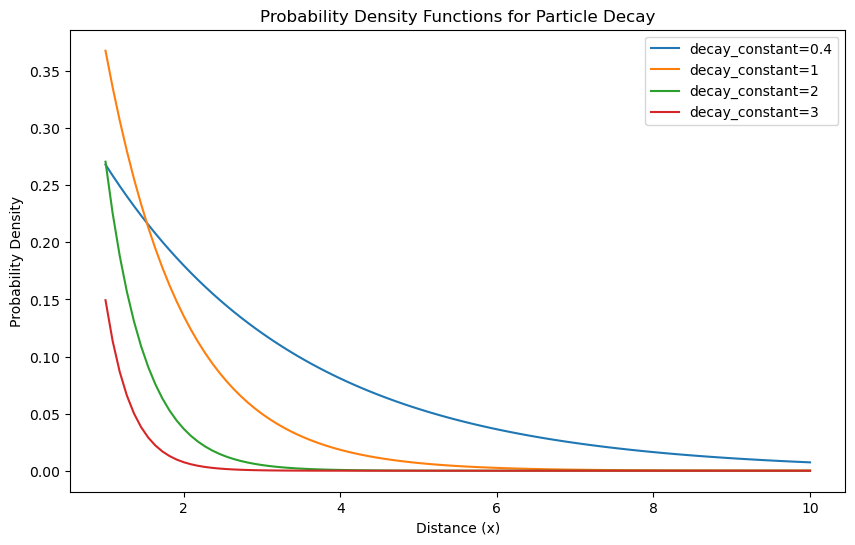

In [6]:
# Problem 2 A and B

import numpy as np
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, decay_constant):
        self.decay_constant = decay_constant
    
    def pdf_decay(self, x):
        if x >= 1:
            return self.decay_constant * (2.718281828459045**(-self.decay_constant * x))
        else:
            return 0

decay_constants = [0.4, 1, 2, 3]

particles = [Particle(dc) for dc in decay_constants]

x_values = np.linspace(1, 10, 100)

probabilities = [[particle.pdf_decay(x) for x in x_values] for particle in particles]

plt.figure(figsize=(10, 6))
for i, dc in enumerate(decay_constants):
    plt.plot(x_values, probabilities[i], label=f'decay_constant={dc}')

plt.xlabel('Distance (x)')
plt.ylabel('Probability Density')
plt.title('Probability Density Functions for Particle Decay')
plt.legend()
plt.show()

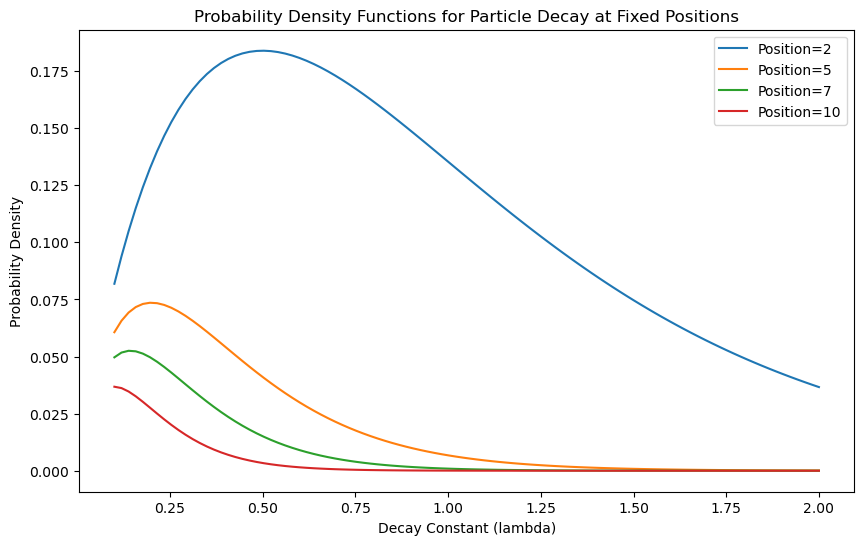

In [9]:
# Problem 2 C

import numpy as np
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, position):
        self.position = position
    
    def pdf_decay(self, decay_constant):
        return decay_constant * (2.718281828459045**(-decay_constant * self.position))

positions = [2, 5, 7, 10]

lambda_values = np.linspace(0.1, 2.0, 100)  # Adjust the range as needed

particles = [Particle(pos) for pos in positions]

probabilities = [[particle.pdf_decay(dc) for dc in lambda_values] for particle in particles]

plt.figure(figsize=(10, 6))
for i, pos in enumerate(positions):
    plt.plot(lambda_values, probabilities[i], label=f'Position={pos}')

plt.xlabel('Decay Constant (lambda)')
plt.ylabel('Probability Density')
plt.title('Probability Density Functions for Particle Decay at Fixed Positions')
plt.legend()
plt.show()

In [13]:
# Problem 2 D

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class Particle:
    def __init__(self, position):
        self.position = position
    
    def pdf_decay(self, decay_constant):
        return decay_constant * (2.718281828459045**(-decay_constant * self.position))
    
    def generate_3d_surface_plot(self, lambda_values, x_values, save_path):
        lambdas, xs = np.meshgrid(lambda_values, x_values)
        probabilities = self.pdf_decay(lambdas)
        
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(xs, lambdas, probabilities, cmap='viridis')
        
        ax.set_xlabel('Distance (x)')
        ax.set_ylabel('Decay Constant (lambda)')
        ax.set_zlabel('Probability Density')
        ax.set_title('3D Surface Plot of Probability Density')
        
        plt.savefig(save_path, format='png')
        plt.close()

particle = Particle(position=2)

lambda_values = np.linspace(0.1, 2.0, 100)
x_values = np.linspace(1, 10, 100)

save_path = 'problem_2/3d_surface_plot.png'

particle.generate_3d_surface_plot(lambda_values, x_values, save_path)

In [17]:
# Problem 2 E
import json
import numpy as np
from scipy.optimize import minimize
from scipy.stats import expon, norm

with open('problem_2/Vacuum_decay_dataset.json', 'r') as f:
    vacuum_data = np.array(json.load(f))

with open('problem_2/Cavity_decay_dataset.json', 'r') as f:
    cavity_data = np.array(json.load(f))


lambda_vacuum = 1 / np.mean(vacuum_data)

def likelihood(params, x):
    lambda_cavity, mu, sigma = params
    return -np.sum(np.log((1/lambda_cavity) * np.exp(-x/lambda_cavity) + norm.pdf(x, mu, sigma)))

initial_guess = [1, np.mean(cavity_data), np.std(cavity_data)]

result = minimize(likelihood, initial_guess, args=(cavity_data,), bounds=((0, None), (None, None), (0, None)))

lambda_cavity, mu, sigma = result.x

print(f"lambda_vacuum: {lambda_vacuum}")
print(f"lambda_cavity: {lambda_cavity}")
print(f"mu: {mu}")
print(f"sigma: {sigma}")

# Vacuum Decay
# We can analyze the 'Vacuum_decay_dataset.json' to estimate the decay constant by fitting an exponential 
# probability distribution to the data and extracting the decay constant from the fit.

# Optical Cavity Decay
# A fraction of particles decay with a different decay constant compared to the vacuum condition.
# Additionally, some particles decay with a Gaussian distribution characterized by  mu and sigma,
# which are the mean and standard deviation. We use a mixture model approach, which is fitting a 
# combination of an exponential distribution and a Gaussian distribution to the data.

# We can estimate lambda, mu, and sigma by maximizing the likelihood function.

# In this problem, we see one decay process with an exponential distribution and the other
# with a Gaussian distribution. This indicates that there are at least two types of particles
# decaying in the optical cavity.

lambda_vacuum: 0.4438527954290497
lambda_cavity: 2.424561832821691
mu: 4.078780225159496
sigma: 2.372247928063714
